In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score
from tqdm import trange

## Load data

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
# y_test = np.load("y_test.npy")

In [3]:
# 7000 data with 300 features
print(x_train.shape)

(7000, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [5]:
def cross_validation(x_train, y_train, k=5):
    ret = []
    mod, l, i = len(x_train) % k, len(x_train) // k, 0
    arr = np.arange(len(x_train))
    np.random.shuffle(arr)
    while i < len(x_train):
        if mod > 0:
            ret.append([np.concatenate((arr[:i], arr[i+l+1:]), axis=0), arr[i:i+l+1]])
            i += l + 1
            mod -= 1
        else:
            ret.append([np.concatenate((arr[:i], arr[i+l:]), axis=0), arr[i:i+l]])  
            i += l
    return ret

In [6]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

## example

In [7]:
# from sklearn.model_selection import KFold

# X = np.arange(20)
# kf = KFold(n_splits=5, shuffle=True)
# kfold_data= []
# for i, (train_index, val_index) in enumerate(kf.split(X)):
#     print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
#     kfold_data.append([train_index, val_index])

In [8]:
# assert len(kfold_data) == 5 # should contain 5 fold of data
# assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
# assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [9]:
clf = SVC(C=1.0, kernel='rbf', gamma=0.01)
kfold_data = cross_validation(x_train, y_train, k=5)

In [10]:
## your code
best_score, best_c, best_g = 0, 0, 0
C = [1, 10, 100, 1000, 10000]
G = [0.000001, 0.00001, 0.0001, 0.001, 0.01]
arr = []
for c in C:
    row = []
    for g in G: 
        total_accuracy = 0
        clf = SVC(C=c, kernel='rbf', gamma=g)
        for split in kfold_data:
            clf.fit([x_train[i] for i in split[0]], [y_train[i] for i in split[0]])
            y_pred = clf.predict([x_train[i] for i in split[1]])
            total_accuracy += accuracy_score([y_train[i] for i in split[1]], y_pred)
        avg_accuracy = total_accuracy / len(kfold_data)
        row.append(round(avg_accuracy, 3))
        if avg_accuracy > best_score:
            best_score, best_c, best_g = avg_accuracy, c, g
        g += 0.001
    arr.append(row)
    c += 1

best_parameters = best_c, best_g

In [14]:
print(best_parameters)

(1, 0.0001)


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

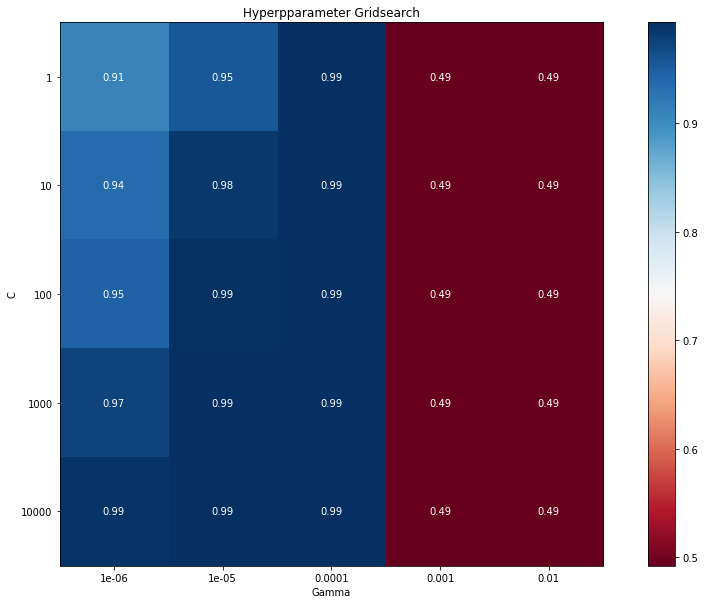

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((16, 10)))
ax = fig.add_subplot(1, 1, 1)
img = ax.imshow(arr, cmap="RdBu")
ax.set_title("Hyperpparameter Gridsearch")
ax.set_xticks(np.arange(len(G)))
ax.set_yticks(np.arange(len(C)))
ax.set_xticklabels(G)
ax.set_yticklabels(C)
ax.set_xlabel('Gamma')
ax.set_ylabel('C')
for i in range(len(C)):
    for j in range(len(G)):
        ax.text(j, i, f'{arr[i][j]:.2f}',
                ha="center", va="center", color="w")
ax.figure.colorbar(img, ax=ax)
plt.savefig('myimage.svg', format='svg', dpi=1200)
plt.show()

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [13]:
best_model = SVC(C=best_parameters[0], kernel='rbf', gamma=best_parameters[1])
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))

NameError: name 'y_test' is not defined